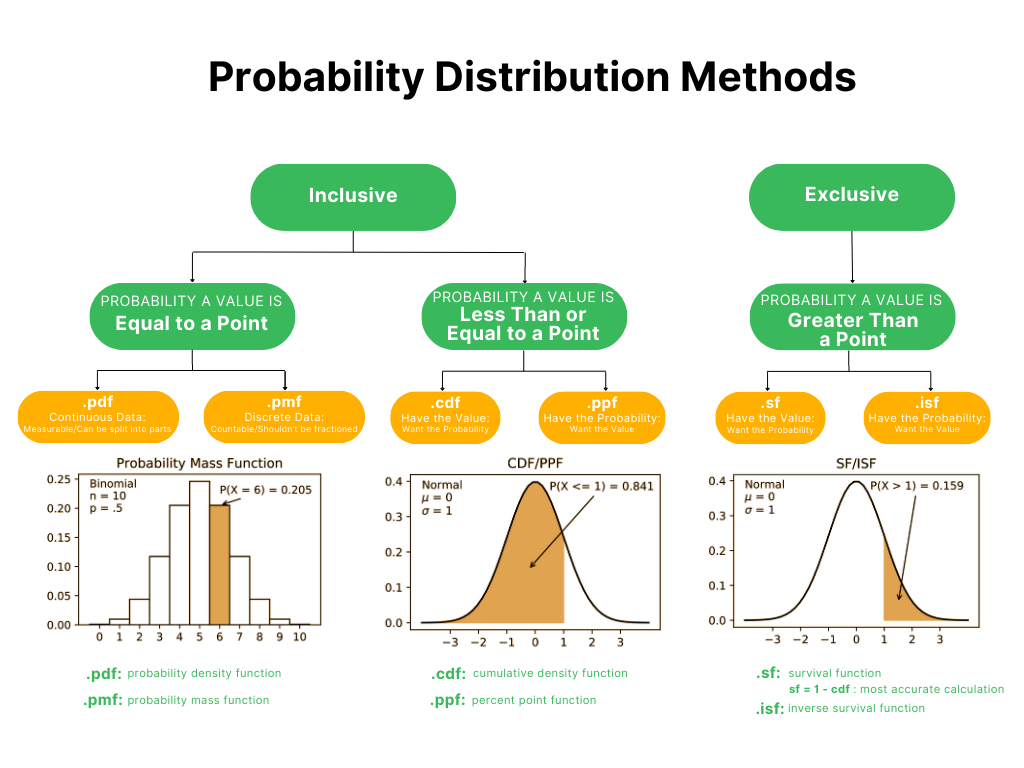

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

# 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a **Poisson distribution** with a **mean of 2 cars**. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

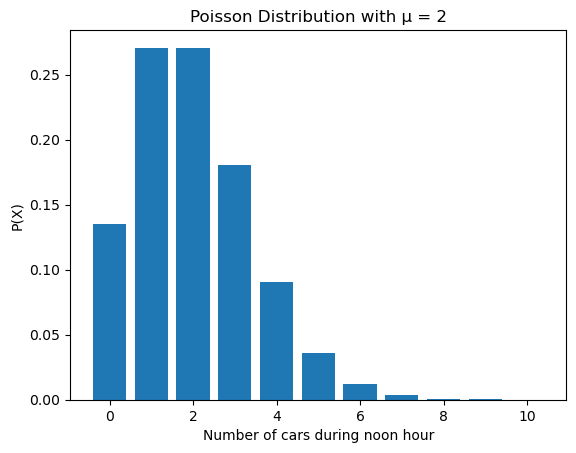

In [2]:
μ = 2

x = np.arange(0,11)
y = stats.poisson(μ).pmf(x)

plt.bar(x,y)

plt.title("Poisson Distribution with μ = 2")
plt.xlabel('Number of cars during noon hour')
plt.ylabel('P(X)');

## 1.1 What is the probability that no cars drive up in the noon hour?

In [4]:
stats.poisson(μ).pmf(0)

0.1353352832366127

In [6]:
round(stats.poisson(μ).pmf(0),2)

0.14

In [5]:
stats.poisson.pmf(0,μ)

0.1353352832366127

Text(3, 0.22, '$P(X = 0) = 0.135$')

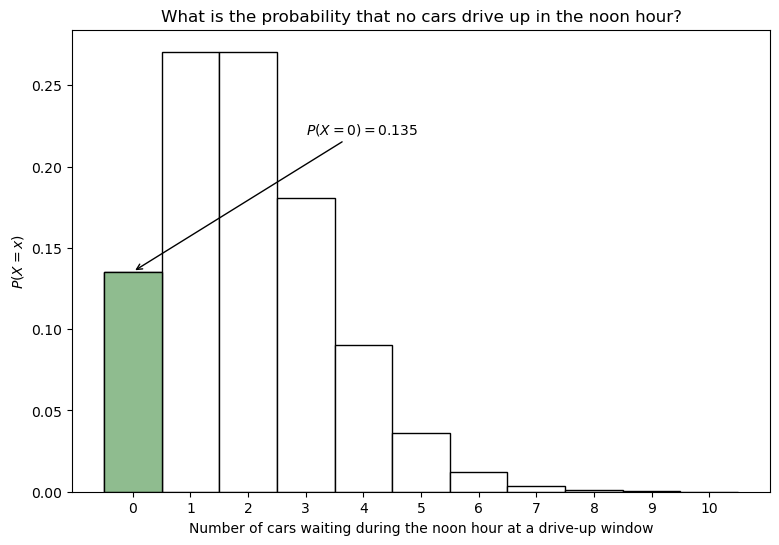

In [7]:
plt.figure(figsize=(9, 6))
plt.bar(
    x, 
    y, 
    edgecolor='black', 
    color='white', 
    width=1
)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cars waiting during the noon hour at a drive-up window')
plt.title('What is the probability that no cars drive up in the noon hour?')
plt.bar(
    0, 
    stats.poisson(μ).pmf(0), 
    width=1, 
    color='darkseagreen', 
    edgecolor='black'
)
plt.annotate(
    f'$P(X = 0) = {stats.poisson(μ).pmf(0):.3f}$', 
    (0, stats.poisson(2).pmf(0)), 
    xytext=(3, .22), 
    arrowprops={'arrowstyle': '->'}
)

## 1.2 What is the probability that 3 **or more** cars come through the drive through?

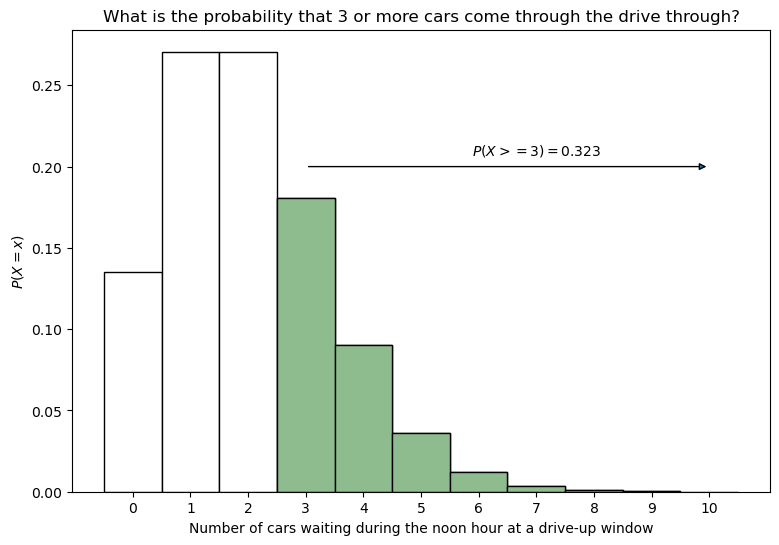

In [8]:
plt.figure(figsize=(9, 6))
plt.bar(x, y, edgecolor='black', color='white', width=1)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cars waiting during the noon hour at a drive-up window')
plt.title('What is the probability that 3 or more cars come through the drive through?')

x1 = np.arange(3, 10)
y1 = stats.poisson(μ).pmf(x1)

plt.bar(x1, y1, width=1, color='darkseagreen', edgecolor='black')

plt.annotate('', xy=(3, .20), xytext=(10, .20), xycoords='data', textcoords='data', arrowprops={'arrowstyle': '<|-'})
plt.text(7, .21, f'$P(X >= 3) = {stats.poisson(μ).sf(2):.3f}$', va='center', ha='center')
plt.show()

In [9]:
stats.poisson(μ).sf(2)

0.32332358381693654

## 1.3 How likely is it that the drive through gets at least 1 car?

In [10]:
#I want GREATER THAN ZERO
stats.poisson(μ).sf(0)

0.8646647167633873

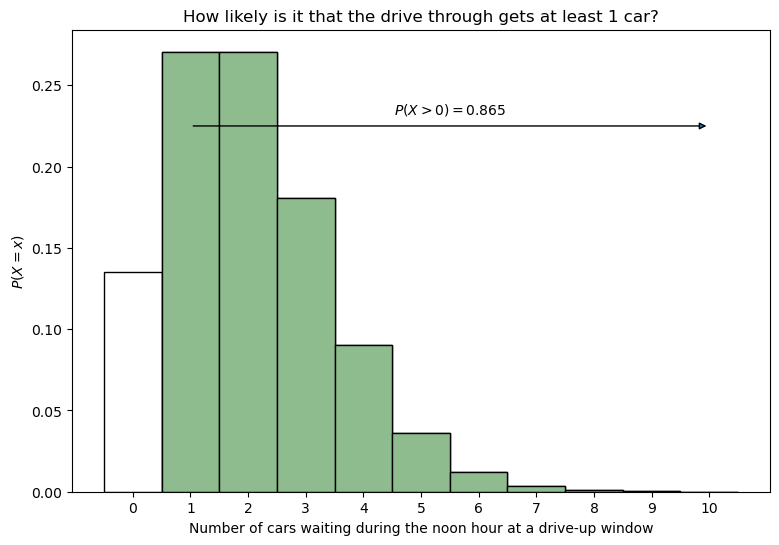

In [11]:
plt.figure(figsize=(9, 6))
plt.bar(
    x, 
    y, 
    edgecolor='black', 
    color='white', 
    width=1
)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cars waiting during the noon hour at a drive-up window')
plt.title('How likely is it that the drive through gets at least 1 car?')

x1 = np.arange(1, 11)
y1 = stats.poisson(μ).pmf(x1)

plt.bar(
    x1, 
    y1, 
    width=1, 
    color='darkseagreen', 
    edgecolor='black'
)

plt.annotate(
    '', 
    xy=(1, .225), 
    xytext=(10, .225), 
    xycoords='data', 
    textcoords='data', 
    arrowprops={'arrowstyle': '<|-'}
)
plt.text(
    5.5, 
    .235, 
    f'$P(X > 0) = {stats.poisson(μ).sf(0):.3f}$', 
    va='center', 
    ha='center')
plt.show()

# 2. Grades of State University graduates are **normally distributed** with a **mean of 3.0** and a **standard deviation of .3**. Calculate the following:

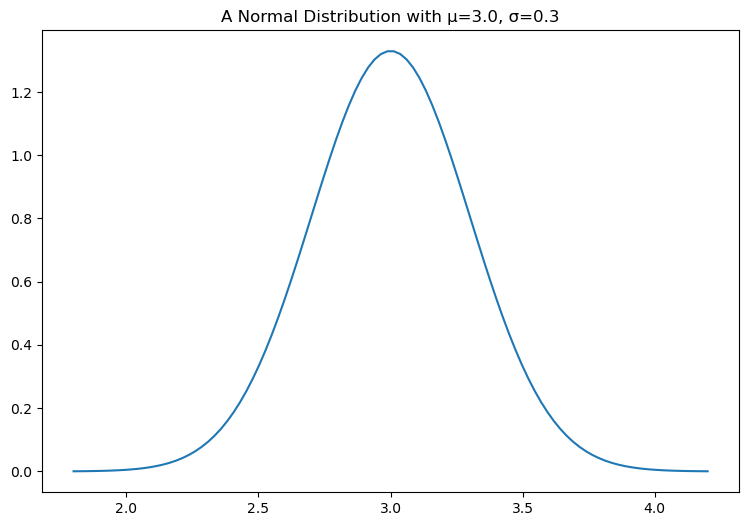

In [13]:
μ = 3.0
σ = 0.3
grade = stats.norm(μ, σ)

x = np.linspace(μ - 4*σ, μ + 4*σ, 100)
y = grade.pdf(x)

plt.figure(figsize=(9, 6))
plt.plot(x, y)
plt.title(f'A Normal Distribution with μ={μ}, σ={σ}')
plt.show()

## 2.1 What grade point average is required to be in the **top 5%** of the graduating class?

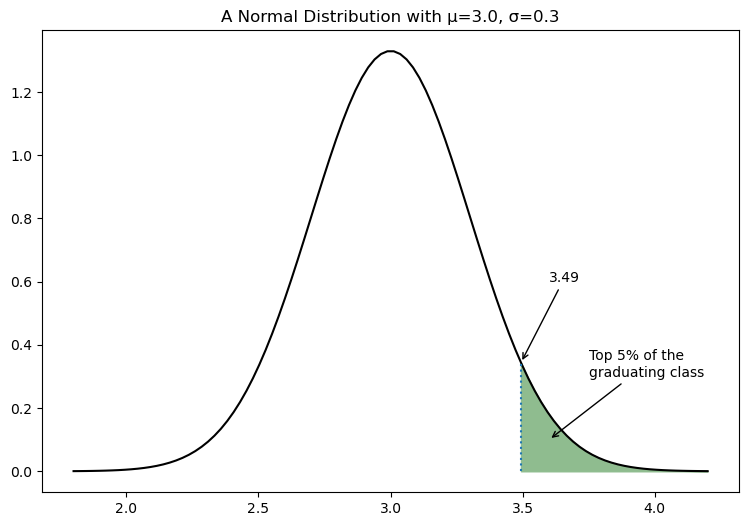

In [14]:
top_5_percent_cutoff = grade.isf(0.05)

plt.figure(figsize=(9, 6))
plt.plot(x, y, color='black')
plt.vlines(top_5_percent_cutoff, 0, grade.pdf(top_5_percent_cutoff), linestyle=':')
plt.title(f'A Normal Distribution with μ={μ}, σ={σ}')

x1 = np.linspace(top_5_percent_cutoff, μ + 4*σ)
y1 = grade.pdf(x1)

plt.fill_between(x1, y1, color='darkseagreen')

plt.annotate(f'{top_5_percent_cutoff:,.2f}', (top_5_percent_cutoff, grade.pdf(top_5_percent_cutoff)),
             xytext=(3.6, .6), arrowprops={'arrowstyle': '->'})
plt.annotate(f'Top 5% of the\ngraduating class', (3.6, .1), xytext=(3.75, .3), arrowprops={'arrowstyle': '->'})

plt.show()

In [15]:
grade.isf(0.05)

3.4934560880854417

In [16]:
grade.ppf(.95)

3.4934560880854417

## 2.2 What GPA constitutes the **bottom 15%** of the class?

In [17]:
grade.ppf(.15)

2.689069983151863

In [18]:
#opposite is also true
grade.isf(.85)

2.689069983151863

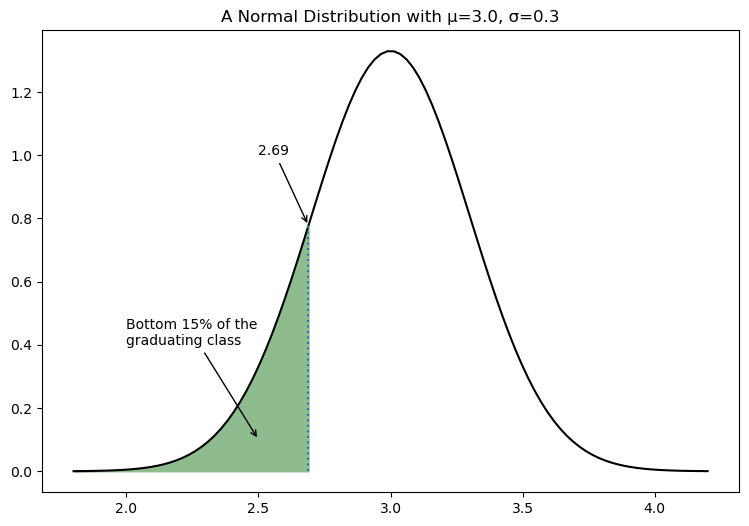

In [19]:
bottom_15_percent_cutoff = grade.ppf(0.15)

plt.figure(figsize=(9, 6))
plt.plot(x, y, color='black')
plt.vlines(bottom_15_percent_cutoff, 0, grade.pdf(bottom_15_percent_cutoff), linestyle=':')
plt.title(f'A Normal Distribution with μ={μ}, σ={σ}')

x1 = np.linspace(μ - 4*σ, bottom_15_percent_cutoff)
y1 = grade.pdf(x1)

plt.fill_between(x1, y1, color='darkseagreen')

plt.annotate(f'{bottom_15_percent_cutoff:,.2f}', (bottom_15_percent_cutoff, grade.pdf(bottom_15_percent_cutoff)),xytext=(2.5, 1.0), arrowprops={'arrowstyle': '->'})
plt.annotate(f'Bottom 15% of the\ngraduating class', (2.5, .1), xytext=(2, .4), arrowprops={'arrowstyle': '->'})

plt.show()

## 2.3 An eccentric alumnus left scholarship money for students in the **third decile** from the bottom of their class. Determine the range of the third decile. Would a student with a **2.8 grade point average** qualify for this scholarship?

<div class="alert alert-block alert-info">
<b>NOTE:</b> 
    <br>
1st decile: 0-10 percentile
     <br>
2nd decile:10-20 percentile
     <br>
3rd decile: 20-30 percentile</div>


In [22]:
#zscores
z_20 = stats.norm.ppf(0.2)
z_30 = stats.norm.ppf(0.3)

#gpa lower and upper bounds of decile
x_20 = μ + z_20 * σ
x_30 = μ + z_30 * σ
gpa_range = (x_20, x_30)


In [23]:
print("Third decile range:", gpa_range)
if 2.8 >= gpa_range[0] and 2.8 <= gpa_range[1]:
    print('Yes, qualifies')
else:
    print("No, doesn't qualify")

Third decile range: (2.7475136299281258, 2.842679846187588)
Yes, qualifies


In [24]:
grade.ppf([.2, .3])

array([2.74751363, 2.84267985])

In [25]:
range_of_gpas = grade.ppf([.2, .3])

In [26]:
(range_of_gpas[0] < 2.8) and (range_of_gpas[1] > 2.8)

True

## 2.4 If I have a GPA of **3.5**, what **percentile** am I in?

In [27]:
grade.cdf(3.5)

0.9522096477271853

In [28]:
print(f"You are in the {round(grade.cdf(3.5), 2)*100}th percentile")

You are in the 95.0th percentile


In [29]:
print(f"You are in the TOP {round(grade.sf(3.5), 2)*100}th percentile")

You are in the TOP 5.0th percentile


# 3. A marketing website has an average click-through rate of **2%**. One day they observe **4326 visitors** and **97 click-throughs**.
## How likely is it that this many people **or more** click through?

<div class="alert alert-block alert-info">
<b>What we know:</b>
    
- 0.02 Probability: Success rate of 2%
    
- n_trials: 4326 visitors
</div>

In [30]:
n_trials = 4326
p= 0.02

click_throughs = stats.binom(n_trials, p)

<div class="alert alert-block alert-info">
<b>What we have:</b>
    
- Greater than as outcome
    
- have 97 visits
</div>

In [31]:
#Discrete value 97 so to incld = 96
click_throughs.sf(96)

0.13975823631416448

In [32]:
1 - click_throughs.cdf(96)

0.1397582363141645

<b>Walkthrough using simulation</b>

In [36]:
clicks = np.random.choice([0,1], (100_000, 4326), p = [.98, .02])
clicks

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
(clicks.sum(axis=1)>96).mean()

0.13926

# 4. You are working on some statistics homework consisting of **100 questions** where all of the answers are a *probability rounded to the hundreths place*. Looking to save time, you put down **random probabilities** as the answer to each question.
- What is the **probability** that **at least one** of your first **60** answers is correct?


In [38]:
#what do we know
n = 60 # first 60 questions
p = 0.01 #1/100 b'c it's random Number between 0 & 1

stats_hmwk = stats.binom(n,p)

In [39]:
stats_hmwk.sf(0)

0.45284335760923855

# 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a **3%** chance that any one student cleans the break area when they visit it, and on any given day, about **90%** of the **3 active cohorts of 22 students** visit the break area. 

In [40]:
# we know

# number of students= 3 cohorts * 22 student/ea = 66 students total
# 90% visit the break rm
# Only 3% are will to clean

n_students = round(.9 * 66)

p=0.03

<b>Let's visualize this</b>

Text(0.5, 1.0, 'Messy Breakroom?')

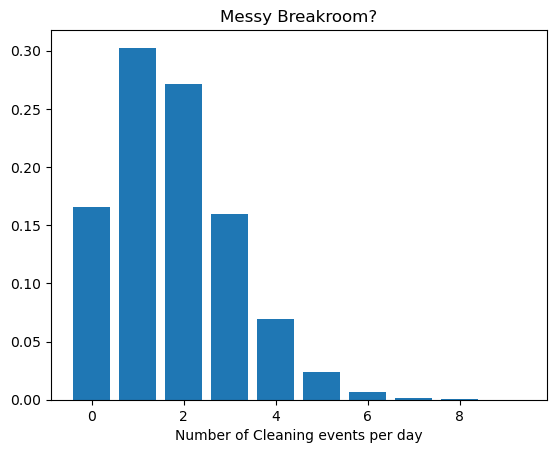

In [41]:
x = np.arange(0,10)
y = stats.binom(n_students, p).pmf(x)
plt.bar(x,y)
plt.xlabel('Number of Cleaning events per day')
plt.title('Messy Breakroom?')

## 5.1 How likely is it that the break area gets cleaned up **each day**? 

In [42]:
clean = stats.binom(n_students, p)

In [43]:
clean.sf(0)

0.8342199288437352

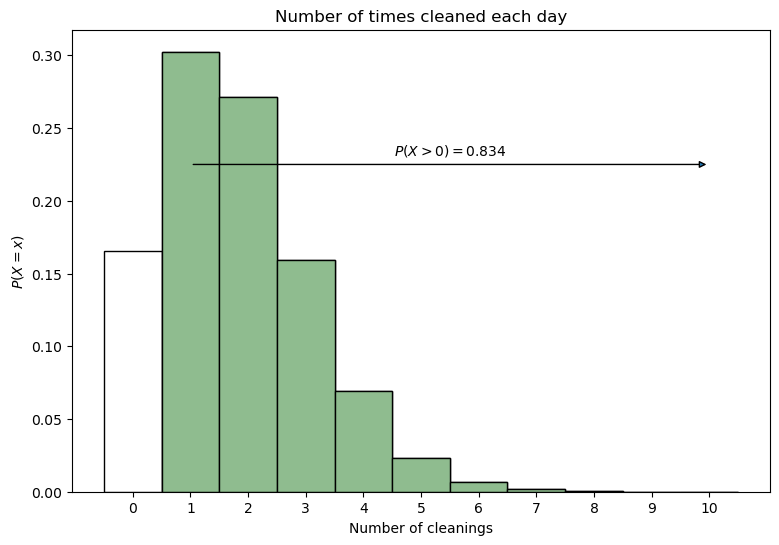

In [44]:
x = np.arange(0, 11)
y = stats.binom(n_students, p).pmf(x)

plt.figure(figsize=(9, 6))
plt.bar(
    x, 
    y, 
    edgecolor='black', 
    color='white', 
    width=1
)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cleanings')
plt.title('Number of times cleaned each day')

x1 = np.arange(1, 11)
y1 = stats.binom(n_students, p).pmf(x1)

plt.bar(
    x1, 
    y1, 
    width=1, 
    color='darkseagreen', 
    edgecolor='black'
)

plt.annotate(
    '', 
    xy=(1, .225), 
    xytext=(10, .225), 
    xycoords='data', 
    textcoords='data', 
    arrowprops={'arrowstyle': '<|-'}
)
plt.text(
    5.5, 
    .235, 
    f'$P(X > 0) = {stats.binom(n_students, p).sf(0):.3f}$', 
    va='center', 
    ha='center')
plt.show()

## 5.2 How likely is it that it goes **two days without** getting cleaned up? 

In [45]:
#This means the number of student visits doubles!
n = n_students * 2
p = 0.03
notclean_2 = stats.binom(n,p)

In [46]:
notclean_2.pmf(0)

0.027483031992576134

In [47]:
print(f"It is {round(notclean_2.pmf(0),3)*100}% likely that the breakroom goes two days without cleaning.")

It is 2.7% likely that the breakroom goes two days without cleaning.


## 5.3 All week?

In [48]:
# 5 days b'c work wk!

n = n_students * 5
p = 0.03
notclean_5 = stats.binom(n,p)

In [50]:
notclean_5.pmf(0)

0.00012521651388091245

In [52]:
print(f"It is {round(notclean_5.pmf(0),5)*100}% likely that the breakroom goes five days without cleaning.")

It is 0.013% likely that the breakroom goes five days without cleaning.


___
Tyler's Approach

In [72]:
rate = .03
stu = round(.9*3*22)
clean = stats.binom(stu, rate)

# daily rate of students cleaning the break area
stu_cl = clean.sf(0)

# 2 days of no cleaning
days = 2
stats.binom(days,1-stu_cl).pmf(days)

# 5 days of no cleaning
days = 5
stats.binom(days,1-stu_cl).pmf(days)  

0.00012521651388091348

# 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is **normally distributed** with a **mean of 15** and **standard deviation of 3**. If it takes **2 minutes for each person** to order, and **10 minutes from ordering to getting your food**, what is the likelihood that you have **at least 15 minutes left** to eat your food before you have to go back to class? 
- Assume you have *one hour for lunch*, and ignore travel time to and from La Panaderia.

<div class="alert alert-block alert-info">
<b>What we know:</b>
    
- Normal Distribution    
    
- Units of Measurement: Are not the same, so conversion will be needed.
    
    - (60 min lunch) - (15 mins to eat) = 45 mins remaining
    
    - (45 min left) - (2 mins to order food) - (10 min wait for food) = 33 mins avail for wait-time
    
- Mean (\mu): 15 ppl, but we are measuring in TIME

    - STDDEV (\sigma): 3 ppl
    
    - 2 mins/person
    

</div>

In [54]:
μ = 15 *2 
σ = 3 *2

total_lunch_time = 60 #mins
eat_time = 15 #mins
order_time = 2 #mins
cook_time = 10 #mins

max_wait = (total_lunch_time - eat_time) - order_time - cook_time
max_wait

33

In [55]:
stats.norm(μ, σ).cdf(max_wait)

0.6914624612740131

In [56]:
print(f"There is a {round(stats.norm(μ, σ).cdf(max_wait), 3)*100}% chance you would have at least 15 minutes remaining to eat.")

There is a 69.1% chance you would have at least 15 minutes remaining to eat.


#### Using PEOPLE instead of TIME
Similarly to the previous solving method, we'd want to use conversion.
Although this time our unit of measurement would want to remain as **PEOPLE**.

- Mean = 15 ppl
- STDDEV = 3 ppl

but....

- wait_time = 33 mins

This can be converted using the knowledge that each person has a 2 min order time.
- Therefore: (33 ppl) / (2mins) = 16.5

In [57]:
33/2

16.5

In [58]:
μ = 15
σ = 3

stats.norm(μ, σ).cdf(16.5)

0.6914624612740131

# 7. Connect to the `employees` database and find the **average** salary of **current** employees, along with the **standard deviation**. For the following questions, calculate the answer based on modeling the employees salaries with a **normal distribution** defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

<div class="alert alert-block alert-info">
<b>IMPORTANT:</b> 
    <br>
    For this exercises, you will need to add your <b>.gitignore</b> as well as your <b>env.py</b> to this repo.
</div>

In [59]:
from pydataset import data
import os 
# SQL LOGIN
host = os.getenv('sqlHOST')
user = os.getenv('sqlUSER')
password = os.getenv('sqlPSWD')

In [60]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'
salaries = pd.read_sql('SELECT * FROM salaries where to_date >now()', url)

In [61]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [62]:
μ = salaries.salary.mean()
μ

72012.23585730705

In [63]:
σ = salaries.salary.std()
σ

17309.99538025198

## 7a. What **percent** of employees earn **less than 60,000**?

In [64]:
stats.norm(μ, σ).cdf(60000)

0.24385742480214423

## 7b. What **percent** of employees earn **more than 95,000**?

In [65]:
stats.norm(μ, σ).sf(95000)

0.09208819199804053

## 7c. What **percent** of employees earn **between 65,000 and 80,000**?

In [66]:
(stats.norm(μ, σ).cdf(80000)) - (stats.norm(μ, σ).cdf(65000))

0.3350605685446666

In [68]:
#Another way using difference:
stats.norm(μ, σ).cdf([65000, 80000])

array([0.34270292, 0.67776349])

In [67]:
np.diff(stats.norm(μ, σ).cdf([65000, 80000]))

array([0.33506057])

In [69]:
# Alt way 2
(1 - stats.norm(μ, σ).cdf(65000)) - stats.norm(μ, σ).sf(80000)

0.3350605685446666

## 7d. What do the **top 5%** of employees **make**?

In [70]:
stats.norm(μ, σ).isf(.05)

100484.64454102777

In [71]:
stats.norm(μ, σ).ppf(.95)

100484.64454102775